## Final Project



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    داده‌های این پروژه به‌صورت یک فایل اکسل در فایلی به نام <code>sales.xlsx</code> در اختیار شما قرار گرفته و توضیحات ستون‌های مجموعه‌داده در جدول زیر آمده است. در ابتدا این داده‌ها را در قالب یک دیتافریم بخوانید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>InvoiceNumber</code>|	یک شماره‌ی ۶ رقمی که به‌طور منحصر به فرد به هر فاکتور اختصاص یافته است. اگر ابتدای این شماره با حرف C شروع شود، به این معنی است که آن فاکتور لغو شده است.|
|<code>ProductCode</code>|یک شماره‌ی ۵ رقمی که به‌طور منحصر به فرد به هر نوع محصول اختصاص یافته است.|
|<code>ProductName</code>|نام محصول|
|<code>Quantity</code>|تعداد سفارش از یک نوع محصول در فاکتور|
|<code>InvoiceDate</code>|تاریخ ایجاد فاکتور|
|<code>UnitPrice</code>|قیمت یک نوع محصول به ازای یک واحد از آن|
|<code>CusotmerId</code>|یک شماره‌ی ۵ رقمی که به‌طور منحصر به فرد به هر مشتری اختصاص یافته‌ است.|
|<code>Country</code>|نام کشور محل سکونت مشتری|

</font>
</div>
</center>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1402)


In [4]:
df=pd.read_excel('sales.xlsx')
df.head()


,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.drop_duplicates()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [7]:
df = df.loc[(df['UnitPrice'] > 0) & (df['UnitPrice'].notnull())]

In [8]:
df = df.loc[(df['CustomerId'].notna()) & (df['CustomerId'] != 0)]

In [13]:
df['InvoiceNumber'] = df['InvoiceNumber'].astype(str)  
df.loc[df['InvoiceNumber'].str.startswith('C'), 'InvoiceNumber']

178       C489449
179       C489449
180       C489449
181       C489449
182       C489449
           ...   
524695    C538123
524696    C538124
524697    C538124
524698    C538124
525282    C538164
Name: InvoiceNumber, Length: 9839, dtype: object

In [14]:
df['InvoiceNumber'] = df['InvoiceNumber'].astype(str)

# Then cast to int for numeric ops  
df['InvoiceNumber'].str.replace('C','').astype(int)

0         489434
1         489434
2         489434
3         489434
4         489434
           ...  
525456    538171
525457    538171
525458    538171
525459    538171
525460    538171
Name: InvoiceNumber, Length: 417503, dtype: int32

In [15]:
df_cancelled = df[df['InvoiceNumber'].str.startswith('C')]
df_regular = df[~df['InvoiceNumber'].str.startswith('C')]

In [23]:
count = df_cancelled.groupby('CustomerId')['InvoiceNumber'].count()
count = count.sort_values(ascending=False)

In [38]:
# Print first 5 rows of data only 
print(count[count.index[:5]]) 

CustomerId
15311.0    171
14911.0    140
17511.0    110
14680.0    104
13798.0    102
Name: InvoiceNumber, dtype: int64


In [40]:
df = df_regular
# ذخیره در فایل csv
df.to_csv('remaining.csv', index=False)

In [42]:
# تعداد سطرهای دیتافریم باقیمانده
remaining_count = len(df) 
remaining_count

407664

In [48]:
df.loc[:, 'InvoiceDate'] = pd.to_datetime(df.loc[:, 'InvoiceDate'])


# حداقل و حداکثر تاریخ  
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print(f' {min_date} till {max_date}')

 2009-12-01 07:45:00 till 2010-12-09 20:01:00


C:\Users\JAAME\AppData\Local\Temp\ipykernel_212\2885697328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['InvoiceDate'].dt.dayofweek


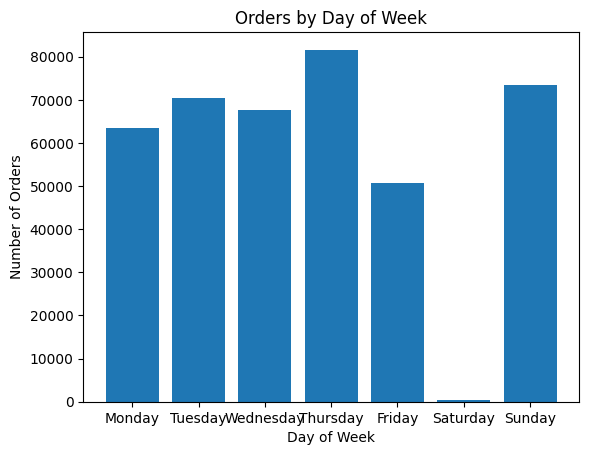

In [51]:

# Extract day from datetime 
df['Day'] = df['InvoiceDate'].dt.dayofweek

# Map numbers to day names
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 

# Group and count orders
orders_by_day = df.groupby('Day').size()

plt.bar(days, orders_by_day)

plt.xlabel('Day of Week')
plt.ylabel('Number of Orders') 
plt.title('Orders by Day of Week')

plt.show()

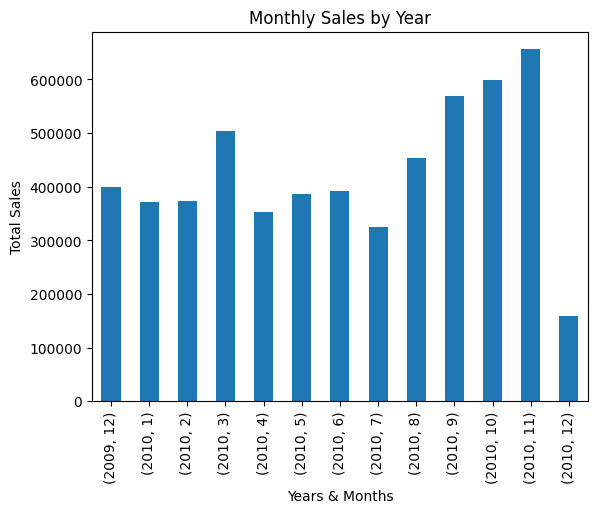

In [59]:

# محاسبه مجموع فروش با گروه بندی سال و ماه
monthly_sales = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['Quantity'].sum()


# رسم نمودار
monthly_sales.plot(kind='bar') 

plt.xlabel('Years & Months')
plt.ylabel('Total Sales')
plt.title('Monthly Sales by Year')

plt.show()